#### 3교시

## 영단어 키워드 분석

### 패키지 설치

In [1]:
# wordcloud 패키지 설치
!pip install wordcloud

In [2]:
# 자연어처리 패키지 설치
!pip install nltk

     ---------------------------------------- 1.5/1.5 MB 9.5 MB/s eta 0:00:00
     ---------------------------------------- 78.4/78.4 kB 4.3 MB/s eta 0:00:00
     ------------------------------------- 262.7/262.7 kB 16.8 MB/s eta 0:00:00
     ------------------------------------- 307.0/307.0 kB 18.5 MB/s eta 0:00:00
     ---------------------------------------- 96.6/96.6 kB 5.4 MB/s eta 0:00:00


### 패키지 import

In [31]:
import pandas as pd
import glob
import re
from functools import reduce
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS, WordCloud

#### nltk 리소스를 최초 한번 다운로드 해야 함

In [4]:
import nltk

In [5]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [6]:
# 파일병합
all_files = glob.glob('./data/*.xls')
all_files

['./data\\1.xls',
 './data\\2.xls',
 './data\\3.xls',
 './data\\4.xls',
 './data\\5.xls']

In [7]:
!pip install xlrd

In [9]:
all_data = []
for file in all_files:
    df = pd.read_excel(file)
    all_data.append(df)

all_data[4]

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Big-Data Reflection High Energy Electron Diffr...,"Vasudevan, R.K.; Tselev, A.; Baddorf, A.P.; Ka...",AMERICAN CHEMICAL SOCIETY,2014
1,NaN,2,Big-Data-Based Intelligent Spectrum Sensing fo...,"Liu, Xin; Sun, Qingquan; Lu, Weidang; Wu, Celi...",IEEE,2020
2,NaN,3,"As Big-Data Companies Enter the Classroom, a P...","BLUMENSTYK, GOLDIE","Chronicle of higher education, etc",2016
3,NaN,4,Persisting big-data: The NoSQL landscape,"Corbellini, Alejandro; Mateos, Cristian; Zunin...","Elsevier Science B.V., Amsterdam.",2017
4,NaN,5,Mobile big-data-driven rating framework: measu...,"Qiao, Y.; Zhao, X.; Yang, J.; Liu, J.",IEEE INSTITUTE OF ELECTRICAL AND ELECTRONICS,2016
...,...,...,...,...,...,...
95,NaN,96,"Political Depression? A Big-Data, Multimethod ...","Simchon, Almog; Guntuku, Sharath Chandra; Simh...",APA AMERICAN PSYCHOLOGICAL ASSOCIATION,2020
96,NaN,97,Framework for Aligning Big-Data Strategy with ...,"Lakoju, Mike; Serrano, Alan","Curran Associates,.",2017
97,NaN,98,Mobile Edge Computing for Big-Data-Enabled Ele...,"Cao, Y.; Song, H.; Kaiwartya, O.; Zhou, B.; Zh...",IEEE INSTITUTE OF ELECTRICAL AND ELECTRONICS,2018
98,NaN,99,»The Human Project«: Big-Data-Studie startet i...,unknown,GOVI VERLAG GMBH,2017


In [10]:
all_data_concat = pd.concat(all_data, axis=0, ignore_index=True)
all_data_concat

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Architecting Time-Critical Big-Data Systems,"Basanta-Val, P.; Audsley, N. C.; Wellings, A. ...",unknown,2016
1,NaN,2,Computation migration: a new approach to execu...,"Nunes, Rickey T. P.; Deshpande, Santosh L.",Inderscience,2018
2,NaN,3,A trust-based crowdfunding campaign marketing ...,"Baah-Peprah, Prince; Shneor, Rotem",Inderscience,2021
3,NaN,4,Big Scholarly Data: A Survey,"Xia, F.; Wang, W.; Bekele, T. M.; Liu, H.",unknown,2017
4,NaN,5,Big-BOE: Fusing Spanish Official Gazette with ...,"Basanta-Val, P.; Sánchez-Fernández, L.",Mary Ann Leibert,2018
...,...,...,...,...,...,...
495,NaN,96,"Political Depression? A Big-Data, Multimethod ...","Simchon, Almog; Guntuku, Sharath Chandra; Simh...",APA AMERICAN PSYCHOLOGICAL ASSOCIATION,2020
496,NaN,97,Framework for Aligning Big-Data Strategy with ...,"Lakoju, Mike; Serrano, Alan","Curran Associates,.",2017
497,NaN,98,Mobile Edge Computing for Big-Data-Enabled Ele...,"Cao, Y.; Song, H.; Kaiwartya, O.; Zhou, B.; Zh...",IEEE INSTITUTE OF ELECTRICAL AND ELECTRONICS,2018
498,NaN,99,»The Human Project«: Big-Data-Studie startet i...,unknown,GOVI VERLAG GMBH,2017


In [11]:
all_data_concat.to_csv('./data/riss_bigdata.csv', index=False, encoding='utf-8')

#### 데이터 전처리

In [13]:
all_title = all_data_concat['제목']
all_title

0            Architecting Time-Critical Big-Data Systems
1      Computation migration: a new approach to execu...
2      A trust-based crowdfunding campaign marketing ...
3                           Big Scholarly Data: A Survey
4      Big-BOE: Fusing Spanish Official Gazette with ...
                             ...                        
495    Political Depression? A Big-Data, Multimethod ...
496    Framework for Aligning Big-Data Strategy with ...
497    Mobile Edge Computing for Big-Data-Enabled Ele...
498    »The Human Project«: Big-Data-Studie startet i...
499    New Pattern of Lifecycle Big-Data-Driven Smart...
Name: 제목, Length: 500, dtype: object

#### 3.5교시

In [18]:
all_data_concat = all_data_concat.drop(['번호','Unnamed: 0'],axis='columns')

In [19]:
all_data_concat

,제목,저자,출판사,출판일
0,Architecting Time-Critical Big-Data Systems,"Basanta-Val, P.; Audsley, N. C.; Wellings, A. ...",unknown,2016
1,Computation migration: a new approach to execu...,"Nunes, Rickey T. P.; Deshpande, Santosh L.",Inderscience,2018
2,A trust-based crowdfunding campaign marketing ...,"Baah-Peprah, Prince; Shneor, Rotem",Inderscience,2021
3,Big Scholarly Data: A Survey,"Xia, F.; Wang, W.; Bekele, T. M.; Liu, H.",unknown,2017
4,Big-BOE: Fusing Spanish Official Gazette with ...,"Basanta-Val, P.; Sánchez-Fernández, L.",Mary Ann Leibert,2018
...,...,...,...,...
495,"Political Depression? A Big-Data, Multimethod ...","Simchon, Almog; Guntuku, Sharath Chandra; Simh...",APA AMERICAN PSYCHOLOGICAL ASSOCIATION,2020
496,Framework for Aligning Big-Data Strategy with ...,"Lakoju, Mike; Serrano, Alan","Curran Associates,.",2017
497,Mobile Edge Computing for Big-Data-Enabled Ele...,"Cao, Y.; Song, H.; Kaiwartya, O.; Zhou, B.; Zh...",IEEE INSTITUTE OF ELECTRICAL AND ELECTRONICS,2018
498,»The Human Project«: Big-Data-Studie startet i...,unknown,GOVI VERLAG GMBH,2017


In [22]:
# 불용어
stopWords = set(stopwords.words('english'))
stopWords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [26]:
# 표제어 추출
lemma = WordNetLemmatizer()

In [32]:
words = []

for title in all_title:
    EnWords = re.sub(r'[^a-zA-Z]+', ' ',str(title)) # 단어가 아닌것들은 빈칸으로 치환
    EnWordsToken = word_tokenize(EnWords.lower())
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords]
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop]

    words.append(EnWordsTokenStopLemma)

In [29]:
# 2차원 리스트
words # 불용어 제거 후 남은 키워드 단어만 남음

[['architecting', 'time', 'critical', 'big', 'data', 'system'],
 ['computation',
  'migration',
  'new',
  'approach',
  'execute',
  'big',
  'data',
  'bioinformatics',
  'workflow'],
 ['trust',
  'based',
  'crowdfunding',
  'campaign',
  'marketing',
  'framework',
  'theoretical',
  'underpinnings',
  'big',
  'data',
  'analytics',
  'practice'],
 ['big', 'scholarly', 'data', 'survey'],
 ['big',
  'boe',
  'fusing',
  'spanish',
  'official',
  'gazette',
  'big',
  'data',
  'technology'],
 ['sport',
  'analytics',
  'era',
  'big',
  'data',
  'moving',
  'toward',
  'next',
  'frontier'],
 ['big',
  'data',
  'new',
  'method',
  'idea',
  'geological',
  'scientific',
  'research'],
 ['call',
  'special',
  'issue',
  'paper',
  'big',
  'data',
  'driven',
  'futuristic',
  'fabric',
  'system',
  'societal',
  'digital',
  'transformation'],
 ['mapping',
  'essential',
  'urban',
  'land',
  'use',
  'category',
  'euluc',
  'using',
  'geospatial',
  'big',
  'data',
  'pr

In [30]:
# 2차원 -> 1차원 리스트로 차원 축소
words_reduce = list(reduce(lambda x, y: x+y, words)) # x+y가 참이면 words
print(words_reduce)

['architecting', 'time', 'critical', 'big', 'data', 'system', 'computation', 'migration', 'new', 'approach', 'execute', 'big', 'data', 'bioinformatics', 'workflow', 'trust', 'based', 'crowdfunding', 'campaign', 'marketing', 'framework', 'theoretical', 'underpinnings', 'big', 'data', 'analytics', 'practice', 'big', 'scholarly', 'data', 'survey', 'big', 'boe', 'fusing', 'spanish', 'official', 'gazette', 'big', 'data', 'technology', 'sport', 'analytics', 'era', 'big', 'data', 'moving', 'toward', 'next', 'frontier', 'big', 'data', 'new', 'method', 'idea', 'geological', 'scientific', 'research', 'call', 'special', 'issue', 'paper', 'big', 'data', 'driven', 'futuristic', 'fabric', 'system', 'societal', 'digital', 'transformation', 'mapping', 'essential', 'urban', 'land', 'use', 'category', 'euluc', 'using', 'geospatial', 'big', 'data', 'progress', 'challenge', 'opportunity', 'scalable', 'data', 'quality', 'big', 'data', 'pythia', 'framework', 'handling', 'missing', 'value', 'correction', 'pr

In [33]:
count = Counter(words_reduce)
count

Counter({'architecting': 1,
         'time': 10,
         'critical': 4,
         'big': 521,
         'data': 565,
         'system': 36,
         'computation': 2,
         'migration': 1,
         'new': 15,
         'approach': 32,
         'execute': 1,
         'bioinformatics': 2,
         'workflow': 2,
         'trust': 1,
         'based': 47,
         'crowdfunding': 1,
         'campaign': 1,
         'marketing': 2,
         'framework': 26,
         'theoretical': 3,
         'underpinnings': 1,
         'analytics': 88,
         'practice': 3,
         'scholarly': 3,
         'survey': 11,
         'boe': 1,
         'fusing': 1,
         'spanish': 1,
         'official': 1,
         'gazette': 1,
         'technology': 8,
         'sport': 3,
         'era': 7,
         'moving': 3,
         'toward': 5,
         'next': 3,
         'frontier': 3,
         'method': 13,
         'idea': 1,
         'geological': 1,
         'scientific': 8,
         'research': 13,
  

In [65]:
word_count = dict()

for tag, counts in count.most_common(20) : # 상위 50개
    if len(str(tag)) > 1 :
        word_count[tag] = counts
        # print(f'{tag} : {counts}')
word_count

{'data': 565,
 'big': 521,
 'analytics': 88,
 'based': 47,
 'analysis': 40,
 'system': 36,
 'issue': 36,
 'approach': 32,
 'special': 32,
 'call': 29,
 'using': 29,
 'paper': 28,
 'framework': 26,
 'model': 26,
 'driven': 24,
 'learning': 24,
 'application': 23,
 'earth': 22,
 'processing': 19,
 'platform': 19}

#### 4교시
#### 단어개수 차트

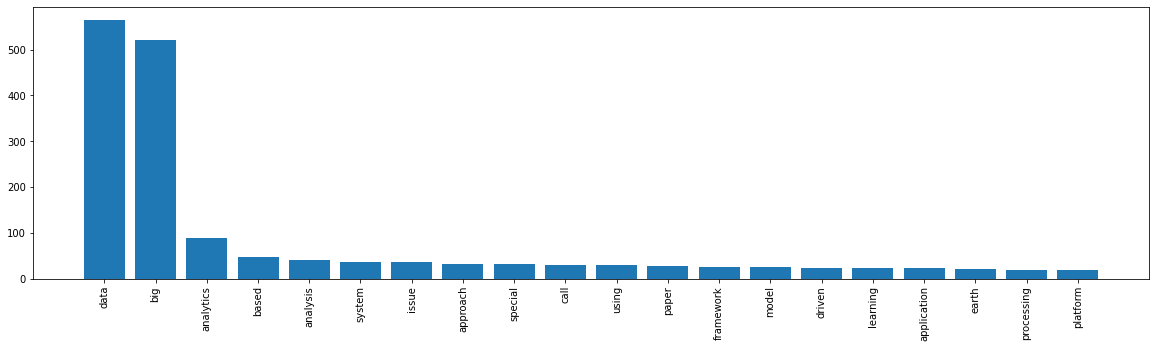

In [66]:
sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.figure(figsize=(20,5))
plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)),list(sorted_Keys), rotation=90)
plt.show()

#### 결과 시각화

In [67]:
all_data_concat['doc_count'] = 0
summary_year = all_data_concat.groupby('출판일', as_index=False)['doc_count'].count()
summary_year

,출판일,doc_count
0,1999,1
1,2004,1
2,2011,1
3,2012,8
4,2013,12
5,2014,44
6,2015,43
7,2016,73
8,2017,78
9,2018,67


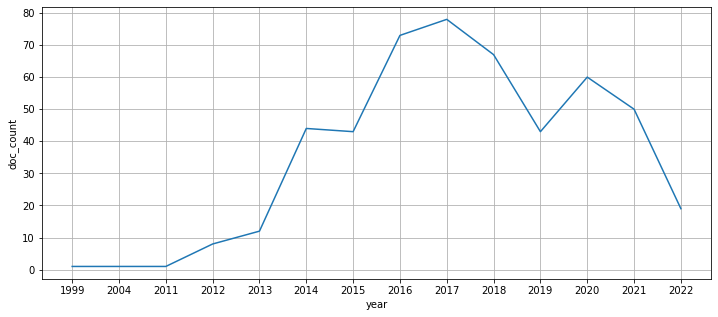

In [68]:
plt.figure(figsize=(12,5))
plt.xlabel('year')
plt.ylabel('doc_count')
plt.grid(True)
plt.plot(range(len(summary_year)),summary_year['doc_count'])
plt.xticks(range(len(summary_year)),[text for text in summary_year['출판일']])
plt.show()

#### 워드클라우드

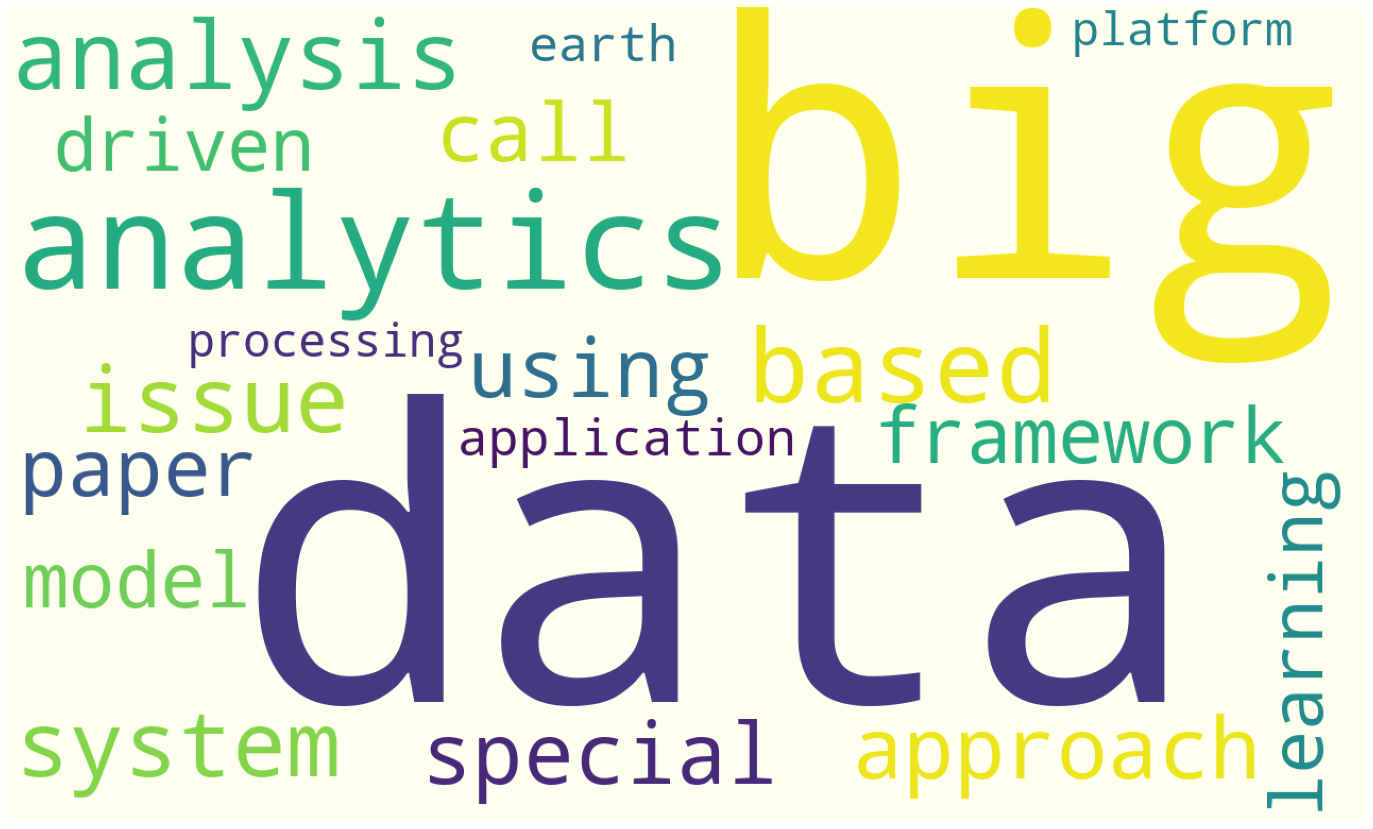

In [69]:
stopwords = set(STOPWORDS)
wc = WordCloud(background_color='ivory', stopwords=stopwords, width=1280, height=768)
cloud = wc.generate_from_frequencies(word_count)
plt.figure(figsize=(40,15))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [70]:
cloud.to_file('./data/riss_bigdata_wordcloud.png')